In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/survey.csv')

In [ ]:
df = df[[  #'Timestamp',
        'Age', 'Gender', 'Country',
        #'state', 'self_employed',
        'family_history', 'treatment', 'work_interfere', 'no_employees',
        #'remote_work','tech_company','benefits',
        'care_options',
        #'wellness_program',
        'seek_help', 'anonymity', 'leave',
        'mental_health_consequence', 'phys_health_consequence', 'coworkers',
        'supervisor', 'mental_health_interview', 'phys_health_interview',
        'mental_vs_physical',
        # 'obs_consequence',
        #'comments']
]].copy()
df

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,care_options,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
0,37,Female,United States,No,Yes,Often,6-25,Not sure,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes
1,44,M,United States,No,No,Rarely,More than 1000,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know
2,32,Male,Canada,No,No,Rarely,6-25,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No
3,31,Male,United Kingdom,Yes,Yes,Often,26-100,Yes,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No
4,31,Male,United States,No,No,Never,100-500,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,Yes,NaN,26-100,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know
1255,32,Male,United States,Yes,Yes,Often,26-100,Yes,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes
1256,34,male,United States,Yes,Yes,Sometimes,More than 1000,Yes,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No
1257,46,f,United States,No,No,NaN,100-500,Yes,No,Don't know,Don't know,Yes,No,No,No,No,No,No


In [ ]:
df.rename(columns={
                'family_history':'Family History',
                'treatment':'Treatment',
                'work_interfere':'Work Interfere',
                'no_employees':'No. of Employees',
                'care_options':'Care Options',
                'seek_help':'Seek Help',
                'anonymity':'Anonymity',
                'leave':'Leave',
                'mental_health_consequence':'Mental Health Consequence',
                'phys_health_consequence':'Physical Health Consequence',
                'coworkers':'Coworkers',
                'supervisor':'Supervisor',
                'mental_health_interview':'Mental Health Interview',
                'mental_vs_physical':'Mental vs Physical',
                'phys_health_interview':'Physical Health Interview'},

inplace=True)

In [ ]:
df.head(2)

,Age,Gender,Country,Family History,Treatment,Work Interfere,No. of Employees,Care Options,Seek Help,Anonymity,Leave,Mental Health Consequence,Physical Health Consequence,Coworkers,Supervisor,Mental Health Interview,Physical Health Interview,Mental vs Physical
0,37,Female,United States,No,Yes,Often,6-25,Not sure,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes
1,44,M,United States,No,No,Rarely,More than 1000,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Country,0
Family History,0
Treatment,0
Work Interfere,262
No. of Employees,0
Care Options,0
Seek Help,0
Anonymity,0


In [ ]:
work_interfere_mode = df['Work Interfere'].mode()[0]
df['Work Interfere'] = df['Work Interfere'].fillna(work_interfere_mode)
df['Work Interfere'].isna().sum()

np.int64(0)

In [ ]:
df.loc[df.duplicated]

,Age,Gender,Country,Family History,Treatment,Work Interfere,No. of Employees,Care Options,Seek Help,Anonymity,Leave,Mental Health Consequence,Physical Health Consequence,Coworkers,Supervisor,Mental Health Interview,Physical Health Interview,Mental vs Physical
821,35,Male,Denmark,Yes,Yes,Often,1-5,Yes,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,Maybe,Yes,Yes
860,32,male,United Kingdom,Yes,Yes,Rarely,6-25,No,No,No,Don't know,Yes,Maybe,Some of them,No,No,No,No
1134,27,M,New Zealand,No,No,Rarely,26-100,Yes,Yes,No,Somewhat difficult,Yes,No,No,No,No,Maybe,No
1171,30,Male,United States,No,No,Sometimes,More than 1000,No,Yes,Don't know,Don't know,Yes,Maybe,No,No,No,No,Don't know
1218,28,male,Netherlands,No,No,Sometimes,6-25,Not sure,No,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know


In [ ]:
df.drop_duplicates(inplace=True)
df.loc[df.duplicated]

,Age,Gender,Country,Family History,Treatment,Work Interfere,No. of Employees,Care Options,Seek Help,Anonymity,Leave,Mental Health Consequence,Physical Health Consequence,Coworkers,Supervisor,Mental Health Interview,Physical Health Interview,Mental vs Physical


In [ ]:
df.Gender = df.Gender.str.lower()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
other = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid",
         "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter",
         "female (trans)", "queer", "ostensibly male, unsure what that really means", "p", "a little about you"]
def categorize_gender(gender):
    if gender in female:
        return 'Female'
    elif gender in male:
        return 'Male'
    else:
        return 'Other'

# Apply the function to the Gender column
df['Gender'] = df['Gender'].apply(categorize_gender)
df.groupby('Gender').size().to_frame().reset_index().rename(columns={0: 'Count'}).style.background_gradient(cmap='Blues')

,Gender,Count
0,Female,247
1,Male,981
2,Other,18


##  Handling Outliers in Age:
To facilitate analysis by age, we create a new feature called 'Age Group' that categorizes individuals into 5-year intervals

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.99)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
df = df[df['Age'] >= 20]
bins = list(range(20, 71, 5)) + [float('inf')]
labels = [f'{i}-{i+4}' for i in range(20, 70, 5)] + ['70+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [ ]:
df.shape

(1230, 19)

In [ ]:
df['Mental vs Physical'] = df['Mental vs Physical'].replace({'Don\'t know': 'Not Sure'})
df['Mental vs Physical'].value_counts()

,count
Mental vs Physical,
Not Sure,562
Yes,336
No,332


In [ ]:
# Drop unnecassary timestamp column
df = df.drop(columns=['Timestamp', 'comments', 'state'])

In [ ]:
# Handling age anomalies
df = df[(df['Age'] > 15) & (df['Age'] < 100)]

In [ ]:
# Determine features and target
y = df['treatment']
X = df.drop('treatment', axis=1)

In [ ]:
# Select columns based on type
categorical_columns = X.select_dtypes(include='object').columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Split dataset to train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [ ]:
# Encoding y out of pipeline
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [ ]:
# Implement pipelines and transformers
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
# Fit pipeline
clf_pipeline.fit(X_train, y_train_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Country',
                                                   'self_employed',
                                                   'family_history',
                                                   'work_interfere',
                                                   'no_employees',
                                                   'remote_work',
                                                   'tech_company', 'benefits',
                                                   'care_options',
                                                   'wellness_program',
                                                   'seek_help', 'anonymity',
                                                   'leave',
                                                   'mental_health_consequence',
                                                   'phys_health_consequence',
                                                   'coworkers', 'supervisor',
                                                   'mental_health_interview',
                                                   'phys_health_interview',
                                                   'mental_vs_physical',
                                                   'obs_consequence'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
# Predict outputs
y_pred = clf_pipeline.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)

In [ ]:
# Training and testing scores
print(f"Training Score: {clf_pipeline.score(X_train, y_train_enc)}")
print(f"Testing Score: {clf_pipeline.score(X_test, y_test_enc)}")

Training Score: 0.781
Testing Score: 0.7569721115537849


In [ ]:
# Accuracy score
accuracy_score(y_test_enc, y_pred)

0.7569721115537849

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test_enc, y_pred))

[[93 34]
 [27 97]]


In [ ]:
# Classification report
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       127
           1       0.74      0.78      0.76       124

    accuracy                           0.76       251
   macro avg       0.76      0.76      0.76       251
weighted avg       0.76      0.76      0.76       251



In [ ]:
scores = cross_val_score(clf_pipeline, X, le.transform(y), cv=5)
print(f"Scores: {scores}")
print(f"CV Accuracy: {scores.mean():.4f}")

Scores: [0.73306773 0.744      0.752      0.74       0.708     ]
CV Accuracy: 0.7354


In [ ]:
correlation = df['Family History'].astype('category').cat.codes.corr(df['Treatment'].astype('category').cat.codes)
print(f'Correlation between Family History and Treatment: {correlation}')

Correlation between Family History and Treatment: 0.3741441424728583


Family History
No     0.356091
Yes    0.739130
Name: Treatment, dtype: float64


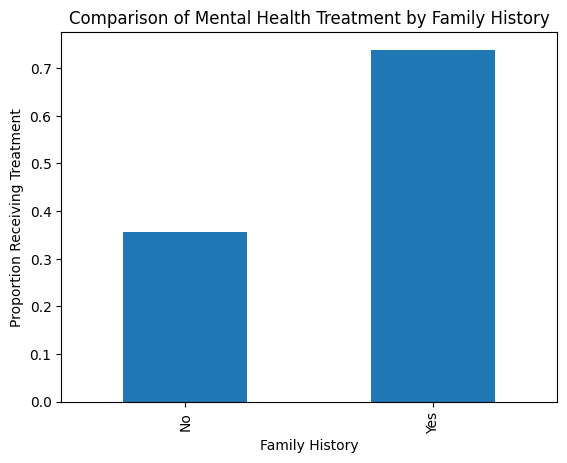

In [ ]:
# Convert the 'Treatment' column to numeric (e.g., 1 for Yes, 0 for No)
df['Treatment'] = df['Treatment'].map({'Yes': 1, 'No': 0})
# Group by 'Family History' and calculate the mean of the 'Treatment' column
comparison = df.groupby('Family History')['Treatment'].mean()
print(comparison)
comparison.plot(kind='bar')
plt.title('Comparison of Mental Health Treatment by Family History')
plt.xlabel('Family History')
plt.ylabel('Proportion Receiving Treatment')
plt.show()

In [ ]:
df['No. of Employees'] = df['No. of Employees'].astype('category')
df['Treatment'] = df['Treatment'].astype('category')

<ipython-input-40-2707084768>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



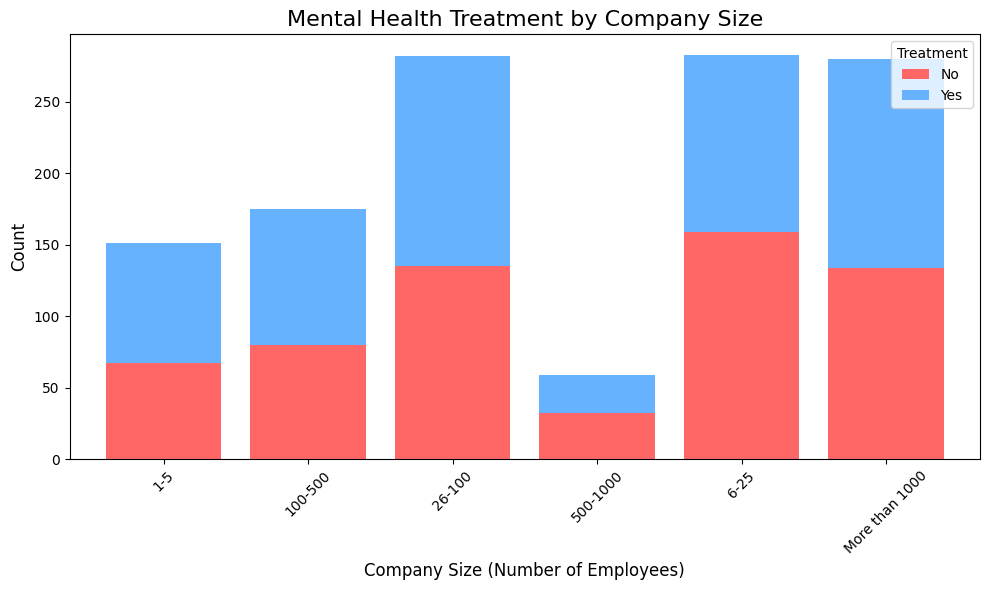

In [ ]:
grouped = df.groupby(['No. of Employees', 'Treatment']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF6666', '#66B2FF'], width=0.8)
plt.title('Mental Health Treatment by Company Size', fontsize=16)
plt.xlabel('Company Size (Number of Employees)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Treatment', labels=['No', 'Yes'], loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
seek_help_counts = df['Seek Help'].value_counts().reset_index()
seek_help_counts.columns = ['Seek Help', 'count']
fig = px.bar(seek_help_counts, x='Seek Help', y='count', labels={'Seek Help': 'Seek Help', 'count': 'Count'}, title='Seek Help Distribution')
fig.show()

In [ ]:
work_interfere_counts = df['Work Interfere'].value_counts().reset_index()
work_interfere_counts.columns = ['Work Interfere', 'count']
fig = px.bar(work_interfere_counts, x='Work Interfere', y='count',
             labels={'Work Interfere': 'Work Interfere', 'count': 'Count'}, title='Work Interfere Distribution')
fig.show()

## Hypothesis Testing

H0: Discussing mental health issues with supervisors does not vary by company size.

H1: Discussing mental health issues with supervisors varies by company size.

In [ ]:
size_supervisors = pd.crosstab(df['No. of Employees'], df['Supervisor'])
size_supervisors

Supervisor,No,Some of them,Yes
No. of Employees,,,
1-5,46,36,69
100-500,46,52,77
26-100,88,83,111
500-1000,19,18,22
6-25,74,70,139
More than 1000,107,83,90


In [ ]:
from scipy import stats
chi, pval, dof, expected = stats.chi2_contingency(size_supervisors)
print(f'chi test stat:{chi}\npvalue: {pval}\ndegree of freedom: {dof}\nexpected vals: {expected}')
print()
if pval < 0.05:
    print('REJECT NULL HYPOTHESIS H0')
    print('DISCUSSING MENTAL HEALTH ISSUES WITH SUPERVISORS VARY BY COMPANY SIZE')

else:
    print('FAIL TO REJECT NULL HYPOTHESIS H0')
    print('DISCUSSING MENTAL HEALTH ISSUES WITH SUPERVISORS DOES NOT VARY BY COMPANY SIZE')

chi test stat:22.352276955952185
pvalue: 0.013407175843716012
degree of freedom: 10
expected vals: [[ 46.6504065   41.98536585  62.36422764]
 [ 54.06504065  48.65853659  72.27642276]
 [ 87.12195122  78.4097561  116.46829268]
 [ 18.22764228  16.40487805  24.36747967]
 [ 87.43089431  78.68780488 116.88130081]
 [ 86.50406504  77.85365854 115.64227642]]

REJECT NULL HYPOTHESIS H0
DISCUSSING MENTAL HEALTH ISSUES WITH SUPERVISORS VARY BY COMPANY SIZE


In [ ]:
import numpy as np
residuals = (size_supervisors - expected) / np.sqrt(expected)
print(residuals)

Supervisor              No  Some of them       Yes
No. of Employees                                  
1-5              -0.095226     -0.923723  0.840279
100-500          -1.096853      0.479024  0.555613
26-100            0.094071      0.518383 -0.506696
500-1000          0.180906      0.393829 -0.479602
6-25             -1.436390     -0.979392  2.045913
More than 1000    2.203685      0.583256 -2.384505


In [ ]:
import seaborn as sns

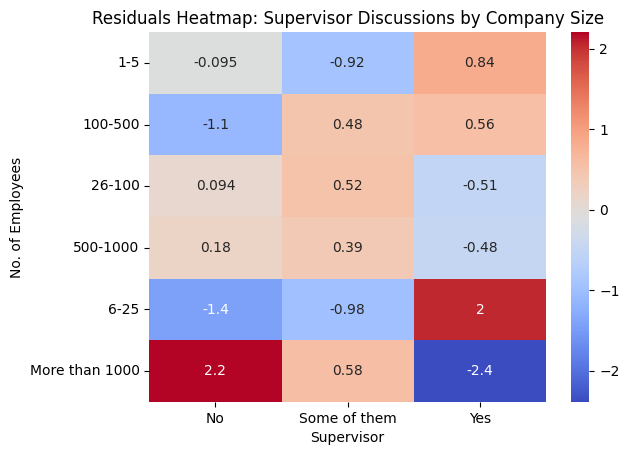

In [ ]:
sns.heatmap(residuals, annot=True, cmap='coolwarm')
plt.title('Residuals Heatmap: Supervisor Discussions by Company Size')
plt.show()

1-5 employees: More likely to discuss mental health with supervisors

6-25 employees: More likely to dicuss mental health with supervisors

26-100 employees: More likely to discuss mental health with some supervisors

100-500 employees: More likely to discuss mental health with supervisors

500-100 employees: Highly unlikely to discuss mental health with supervisor suggesting potential cultural barrier in larger organizations

H0: There is no difference in the likelihood of seeking mental health treatment between different gender respondents.

H1: There is a difference in the likelihood of seeking mental health treatment between different gender respondents.

Since both gender and seek_help is categorical, chi squared test of independence is used

In [ ]:
gender_help = pd.crosstab(df['Gender'], df['Seek Help'])
gender_help

Seek Help,Don't know,No,Yes
Gender,,,
Female,74,115,57
Male,282,503,183
Other,3,10,3


In [ ]:
from scipy import stats
chi, pval, dof, expected = stats.chi2_contingency(gender_help)
print(f'chi test stat:{chi}\npvalue: {pval}\ndegree of freedom: {dof}\nexpected vals: {expected}')


chi test stat:3.9410806115949337
pvalue: 0.41403844448859806
degree of freedom: 4
expected vals: [[ 71.8        125.6         48.6       ]
 [282.5300813  494.23089431 191.23902439]
 [  4.6699187    8.16910569   3.16097561]]


In [ ]:
if pval < 0.05:
    print('REJECT NULL HYPOTHESIS H0')
    print('THERE IS A DIFFERENCE IN LIKELIHOOD OF SEEKING MENTAL HEALTH TREATMENT BETWEEN DIFFERENT GENDER RESPONDENTS')

else:
    print('FAIL TO REJECT NULL HYPOTHESIS H0')
    print('THERE IS NO DIFFERENCE IN LIKELIHOOD OF SEEKING MENTAL HEALTH TREATMENT BETWEEN DIFFERENT GENDER RESPONDENTS')

FAIL TO REJECT NULL HYPOTHESIS H0
THERE IS NO DIFFERENCE IN LIKELIHOOD OF SEEKING MENTAL HEALTH TREATMENT BETWEEN DIFFERENT GENDER RESPONDENTS


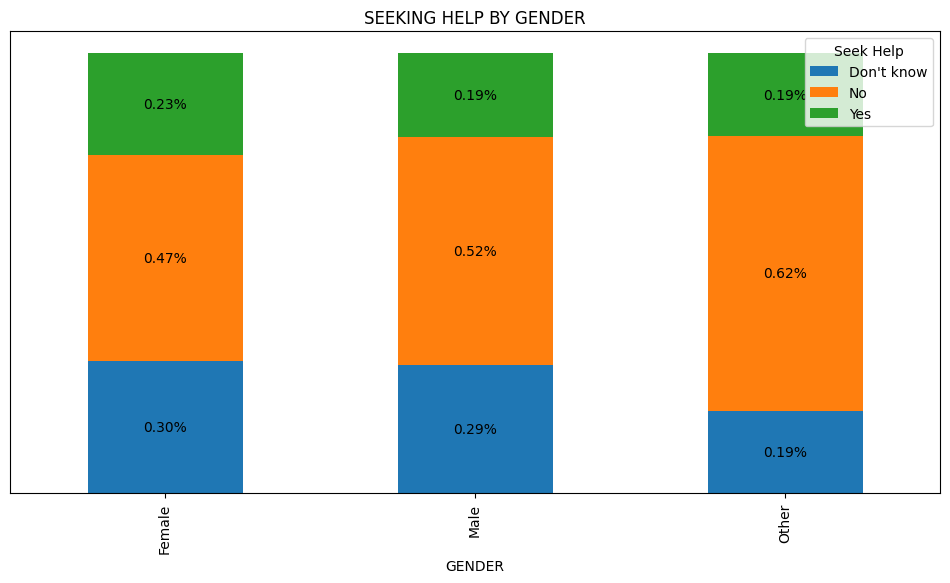

In [ ]:
gender_help_bar = pd.crosstab(df['Gender'], df['Seek Help'], normalize= 'index')
a = gender_help_bar.plot(kind= 'bar', stacked= True, figsize=(12, 6))
for i in a.containers:
    a.bar_label(i, label_type='center', fmt='%.2f%%')
plt.title('SEEKING HELP BY GENDER')
plt.gca().get_yaxis().set_visible(False)
plt.xlabel('GENDER')
plt.show()

## Funnel 1: Employee Support Funnel

In [ ]:
funnel1 = {
    "Total Employees": len(df),
    "Company Provides Care Options": len(df[df["Care Options"] == "Yes"]),
    "Employee Seeks Help": len(df[(df["Care Options"] == "Yes") & (df["Seek Help"] == "Yes")]),
    "Low Work Interference (Productive)": len(df[(df["Care Options"] == "Yes") &
                                                  (df["Seek Help"] == "Yes") &
                                                  (df["Work Interfere"].isin(["Never", "Rarely"]))])
}

print("🔹 Funnel 1: Employee Support Funnel")
for step, count in funnel1.items():
    print(f"{step}: {count} ({round(count / funnel1['Total Employees'] * 100, 2)}%)")


🔹 Funnel 1: Employee Support Funnel
Total Employees: 1230 (100.0%)
Company Provides Care Options: 435 (35.37%)
Employee Seeks Help: 165 (13.41%)
Low Work Interference (Productive): 66 (5.37%)


1. Limited Access to Care
Only 35% of employees have care options available.

This suggests that mental health support is not widely accessible across organizations.

2. Low Help-Seeking Rate
Out of 435 employees with access, only 165 (≈38%) actually seek help.

Indicates a potential stigma, lack of awareness, or trust issues even when support exists.

3. Support Improves Productivity
Just 66 employees (about 15% of those who sought help) report low work interference.

Suggests that when care is available and employees utilize it, it positively impacts their productivity.

4. Drop-off at Every Stage
The sharp drop from 1230 → 435 → 165 → 66 shows that organizational support alone isn't enough — employees need:

Safe spaces (anonymity, trust),

Encouragement to seek help,

Managers and culture that normalize mental health conversations.

In [ ]:
import plotly.express as px

stages = ['Total Employees', 'Care Options Provided', 'Seek Help', 'Low Work Interference']
counts = [1230, 435, 165, 66]

fig = px.funnel(
    y=stages,
    x=counts,
    labels={'x': 'Number of Employees', 'y': 'Funnel Stages'},
    title="Employee Support Funnel"
)
fig.show()


##  Funnel 2: Mental Health Risk Funnel

In [ ]:
funnel2 = {
    "Family History of Mental Illness": len(df[df["Family History"] == "Yes"]),
    "Reported Mental Health Consequences": len(df[(df["Family History"] == "Yes") &
                                                  (df["Mental Health Consequence"] == "Yes")]),
    "Supervisor Support = No": len(df[(df["Family History"] == "Yes") &
                                      (df["Mental Health Consequence"] == "Yes") &
                                      (df["Supervisor"] == "No")]),
    "High Work Interference (Often/Always)": len(df[(df["Family History"] == "Yes") &
                                                    (df["Mental Health Consequence"] == "Yes") &
                                                    (df["Supervisor"] == "No") &
                                                    (df["Work Interfere"].isin(["Often", "Always"]))])
}

print("\n🔹 Funnel 2: Mental Health Risk Funnel")
for step, count in funnel2.items():
    print(f"{step}: {count} ({round(count / funnel2['Family History of Mental Illness'] * 100, 2)}%)")


🔹 Funnel 2: Mental Health Risk Funnel
Family History of Mental Illness: 483 (100.0%)
Reported Mental Health Consequences: 130 (26.92%)
Supervisor Support = No: 81 (16.77%)
High Work Interference (Often/Always): 13 (2.69%)


In [ ]:
stages2 = [
    'Family History of Mental Illness',
    'Reported Mental Health Consequences',
    'No Supervisor Support',
    'High Work Interference'
]
counts2 = [483, 130, 81, 13]

fig2 = px.funnel(
    y=stages2,
    x=counts2,
    labels={'x': 'Employees', 'y': 'Stage'},
    title="Mental Health Risk Funnel"
)
fig2.show()


1. Family History Doesn't Always Lead to Problems — But Still a Risk
27% of employees with a family history of mental illness report facing consequences due to their own mental health.

This suggests that while family history is a known risk, the majority (73%) don’t report direct impact — possibly due to early awareness, personal resilience, or workplace factors.

2. Supervisor Support is a Key Risk Factor
Of those affected, 62% (81 of 130) say they don’t have supportive supervisors.

Lack of managerial support clearly correlates with increased mental health consequences.

3. Burnout Risk Is Low, But Serious
Only 13 employees (2.69%) experience frequent work interference, but these are high-risk individuals:

They have family history,

Report consequences,

Lack supervisor support.

These individuals are at high risk for burnout, absenteeism, or resignation.

🧠 Key Takeaway:
Even if only a small percentage experience severe interference, they represent a critical group whose mental health issues are likely unaddressed, escalating into performance problems.

## Funnel 3: Interview Openness Funnel

In [ ]:
funnel3 = {
    "Open to Mental Health Interview": len(df[df["Mental Health Interview"] == "Yes"]),
    "Company Offers Anonymity": len(df[(df["Mental Health Interview"] == "Yes") &
                                       (df["Anonymity"] == "Yes")]),
    "Seeks Help": len(df[(df["Mental Health Interview"] == "Yes") &
                         (df["Anonymity"] == "Yes") &
                         (df["Seek Help"] == "Yes")]),
    "Low Work Interference (Productive)": len(df[(df["Mental Health Interview"] == "Yes") &
                                                 (df["Anonymity"] == "Yes") &
                                                 (df["Seek Help"] == "Yes") &
                                                 (df["Work Interfere"].isin(["Never", "Rarely"]))])
}

print("\n🔹 Funnel 3: Interview Openness Funnel")
for step, count in funnel3.items():
    print(f"{step}: {count} ({round(count / funnel3['Open to Mental Health Interview'] * 100, 2)}%)")



🔹 Funnel 3: Interview Openness Funnel
Open to Mental Health Interview: 40 (100.0%)
Company Offers Anonymity: 17 (42.5%)
Seeks Help: 7 (17.5%)
Low Work Interference (Productive): 2 (5.0%)


In [ ]:
stages3 = [
    'Open to Mental Health Interview',
    'Company Offers Anonymity',
    'Seeks Help',
    'Low Work Interference'
]
counts3 = [40, 17, 7, 2]

fig3 = px.funnel(
    y=stages3,
    x=counts3,
    labels={'x': 'Employees', 'y': 'Stage'},
    title="Interview Openness Funnel"
)
fig3.show()

1. Openness ≠ Action
All 40 employees say they’re open to discussing mental health in interviews.

Yet only 7 (17.5%) actually seek help — suggesting that openness alone doesn’t translate into action, possibly due to structural or cultural barriers.

2. Anonymity is a Gatekeeper
Only 17 of the 40 say their company offers anonymity around mental health — a critical enabler.

That’s just 42.5%, and it correlates with lower help-seeking behavior.

3. Smallest Subgroup is the Most Stable
Just 2 individuals out of 40 are at the "productive" stage (low work interference).

These employees made it through all layers: openness → anonymity → seeking help → managing impact.

It highlights that a supportive, anonymous culture is necessary to move from willingness to action and ultimately productivity.

🧠 Key Takeaway:
Merely being open to conversations around mental health doesn’t guarantee improved outcomes. Without trust mechanisms like anonymity, employees hesitate to act, which limits the actual productivity benefits of mental health awareness.

In [ ]:
import plotly.io as pio
pio.show(fig1)  # This opens the interactive chart in the notebook


In [ ]:
import os

# Create directory for saving HTMLs
os.makedirs("images", exist_ok=True)

# 🔹 Funnel 1: Employee Support Funnel
labels1 = [
    "Total Employees (1230)",
    "Company Provides Care Options (435)",
    "Employee Seeks Help (165)",
    "Low Work Interference (66)"
]
values1 = [1230, 435, 165, 66]

fig1 = go.Figure(go.Funnel(
    y=labels1,
    x=values1,
    textinfo="value+percent initial"
))
fig1.update_layout(title="Funnel 1: Employee Support Funnel")

# Display & Save
pio.show(fig1)
fig1.write_html("images/funnel1_employee_support.html")


# 🔹 Funnel 2: Mental Health Risk Funnel
labels2 = [
    "Family History of Mental Illness (483)",
    "Reported Mental Health Consequences (130)",
    "Supervisor Support = No (81)",
    "High Work Interference (13)"
]
values2 = [483, 130, 81, 13]

fig2 = go.Figure(go.Funnel(
    y=labels2,
    x=values2,
    textinfo="value+percent initial"
))
fig2.update_layout(title="Funnel 2: Mental Health Risk Funnel")

pio.show(fig2)
fig2.write_html("images/funnel2_mental_risk.html")


# 🔹 Funnel 3: Interview Openness Funnel
labels3 = [
    "Open to Mental Health Interview (40)",
    "Company Offers Anonymity (17)",
    "Seeks Help (7)",
    "Low Work Interference (2)"
]
values3 = [40, 17, 7, 2]

fig3 = go.Figure(go.Funnel(
    y=labels3,
    x=values3,
    textinfo="value+percent initial"
))
fig3.update_layout(title="Funnel 3: Interview Openness Funnel")

pio.show(fig3)
fig3.write_html("images/funnel3_interview_openness.html")